In [42]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import operator
import os
from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold
import tqdm
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools
import pickle
#matrix inverse
from numpy.linalg import inv
import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules
#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

n_classifier = 7

col_rs = hp.col_rs
col_es = hp.col_es
col_le = hp.col_le



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# [p241,p226] = modules.build_patients(-2, 90)
# pat_list = [p241,p226]
#p241 = modules.build_patients(241, 90)
#p231 = modules.build_patients(231, 90)
# p231, p222_1, p222_2, p229 = modules.build_patients(-1,90, if_weekly = 1)
# pat_list = [p231, p222_1, p222_2, p229]
# for pat in pat_list:
#     JJ.save_object(pat, '../patients/' + pat.id +'.p')

# p231, p222_1, p222_2, p241 = modules.build_patients(231,90, if_weekly = 0, if_2weekly = 0, if_PSV = 1)
# pat_list = [p231, p222_1, p222_2, p241]
# if_PSV = 1
# p231 = modules.build_patients(231,90, if_weekly = 0, if_2weekly = 0, if_PSV = if_PSV)
# pat_list = [p231]
if_PSV = 1
p241 = modules.build_patients(241,90, if_weekly = 0, if_2weekly = 0, if_PSV = if_PSV)
pat_list = [p241]

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [33]:
pd.set_option('display.max_columns', 80)

p231.features

filename             region_start_time  long_epi  sleep      Delta1  \
646   1.313099e+17 2017-02-07 04:00:29.000016000  0.0       1.0    52.540879    
647   1.313099e+17 2017-02-07 10:00:27.000028800  0.0       0.0    67.371989    
648   1.313100e+17 2017-02-07 16:00:26.000035200  0.0       0.0    99.857643    
649   1.313103e+17 2017-02-07 22:00:13.000032000  0.0       0.0    129.677420   
650   1.313103e+17 2017-02-08 04:00:12.000038400  0.0       1.0    91.679727    
651   1.313108e+17 2017-02-08 10:00:10.999958400  0.0       0.0    116.925373   
652   1.313108e+17 2017-02-08 16:00:09.999964800  0.0       0.0    89.494190    
653   1.313117e+17 2017-02-09 15:59:54.999974400  0.0       0.0    82.446978    
654   1.313126e+17 2017-02-09 21:59:42.999964800  0.0       0.0    326.016488   
655   1.313126e+17 2017-02-10 03:59:41.999971200  0.0       1.0    72.776059    
656   1.313126e+17 2017-02-10 09:59:40.999977600  0.0       0.0    108.229481   
657   1.313126e+17 2017-02-10 15:59:38.999990400  0.0       0.0    85.071146    
658   1.313129e+17 2017-02-10 21:59:26.999980800  0.0       0.0    111.902551   
659   1.313129e+17 2017-02-11 03:59:25.999987200  0.0       1.0    201.461377   
660   1.313134e+17 2017-02-11 09:59:25.999987200  0.0       0.0    60.616129    
661   1.313134e+17 2017-02-11 15:59:24.000000000  0.0       0.0    123.753541   
662   1.313143e+17 2017-02-12 15:59:07.000022400  0.0       0.0    105.109073   
663   1.313151e+17 2017-02-13 09:58:55.000012800  0.0       0.0    94.931808    
664   1.313151e+17 2017-02-13 15:58:54.000019200  0.0       0.0    209.120596   
665   1.313160e+17 2017-02-13 21:58:41.000016000  0.0       0.0    127.633468   
666   1.313160e+17 2017-02-14 03:58:39.000028800  0.0       1.0    110.453902   
667   1.313160e+17 2017-02-14 09:58:38.000035200  0.0       0.0    118.026761   
668   1.313160e+17 2017-02-14 15:58:37.000041600  0.0       0.0    95.580090    
669   1.313178e+17 2017-02-16 09:58:08.999961600  0.0       0.0    117.004756   
670   1.313178e+17 2017-02-16 15:58:07.999968000  0.0       0.0    99.109436    
671   1.313187e+17 2017-02-16 21:57:54.999964800  0.0       0.0    453.855925   
672   1.313187e+17 2017-02-17 03:57:53.999971200  0.0       1.0    289.936093   
673   1.313187e+17 2017-02-17 09:57:51.999984000  0.0       0.0    113.337014   
674   1.313187e+17 2017-02-17 15:57:50.999990400  0.0       0.0    92.519170    
675   1.313190e+17 2017-02-17 21:57:38.999980800  0.0       0.0    307.360492   
676   1.313190e+17 2017-02-18 03:57:36.999993600  0.0       1.0    124.314776   
677   1.313195e+17 2017-02-18 09:57:37.999987200  0.0       0.0    76.204433    
678   1.313195e+17 2017-02-18 15:57:36.000000000  0.0       0.0    98.416434    
679   1.313204e+17 2017-02-18 21:57:23.999990400  0.0       0.0    390.385652   
680   1.313204e+17 2017-02-19 03:57:22.999996800  0.0       1.0    158.472801   
681   1.313204e+17 2017-02-19 09:57:22.000003200  0.0       0.0    69.980259    
682   1.313204e+17 2017-02-19 15:57:20.000015999  0.0       0.0    85.529898    
683   1.313208e+17 2017-02-19 21:57:08.000006400  0.0       0.0    314.449062   
684   1.313208e+17 2017-02-20 03:57:07.000012800  0.0       1.0    171.313947   
685   1.313212e+17 2017-02-20 09:57:06.000019200  0.0       0.0    65.611015    
686   1.313212e+17 2017-02-20 15:57:05.000025600  0.0       0.0    61.261887    
687   1.313221e+17 2017-02-20 21:56:54.000009600  0.0       0.0    227.575099   
688   1.313221e+17 2017-02-21 03:56:53.000016000  0.0       1.0    77.789087    
689   1.313221e+17 2017-02-21 09:56:52.000022400  0.0       0.0    73.630912    
690   1.313221e+17 2017-02-21 15:56:50.000035200  0.0       0.0    96.956591    
691   1.313229e+17 2017-02-21 21:56:38.000025600  0.0       0.0    188.976039   
692   1.313229e+17 2017-02-22 03:56:36.000038400  0.0       1.0    99.018581    
693   1.313229e+17 2017-02-22 09:56:35.000044800  0.0       0.0    87.488023    
694   1.313229e+17 2017-02-22 15:56:33.99

In [3]:
#plot_funcs.plot_epoch_mean(pat_list, if_save = 1, label = '')


In [44]:
def parameter_tuning(pat, X_train, X_test, y_train, y_test, classifier, C_range_num = 30, if_save = 0,
                     nfold = 10, if_show = 1):
    #defs is a dictionary to initiate classifier with the parameters that don't need to be tuned
    defs = {}
    defs['classifier'] = classifier
    
    num_instances, num_features = X_train.shape[0], X_train.shape[1]
    n_fold = 10

    skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    CV = skf.split(np.zeros(len(y_train)), y_train)
    

    if classifier==1:
        clf_name = 'Logistic Regression'
        defs['class_weight'] = 'balanced'
        defs['max_iter'] = 200
        C_range = 10 ** np.random.uniform(-2, 1, size = C_range_num)
        tuned_params = dict(penalty=['l1','l2'], C=C_range)
    elif classifier == 2: 
        clf_name = 'SVM'
        defs['class_weight'] = 'balanced'
        kernel_list = ['rbf']    
        gamma_list = [2**i*1/num_features for i in range(1)]
        #degree_list = [2,3,4,5]
        C_range = 10 ** np.random.uniform(-3, 1, size = C_range_num)
        tuned_params = dict(kernel=kernel_list,gamma = gamma_list, C=C_range)

    elif classifier==3:
        clf_name = 'Gaussian Naive Bayes classifier'
        prr = np.ones(2) * (1.0/2)
        defs['priors'] = prr
        clf_try = JJ.clf_list(defs)
        clf_try.fit(X_train, y_train)
        pat.estimator[classifier] = clf_try
        return

    elif classifier==4:
        clf_name = 'Linear Discriminant Analysis'
        prr = np.ones(2) * (1.0/2)
        defs['solver'] = 'eigen'  # 'svd', 'lsqr', 'eigen'
        defs['shrinkage'] = 'auto'
        defs['priors'] = prr
        clf_try = JJ.clf_list(defs)
        clf_try.fit(X_train, y_train)
        pat.estimator[classifier] = clf_try
        return
    elif classifier == 5:
        clf_name = 'decision tree'
        mss_list = [5,10,20,40,60]
        criterion_list = ['entropy']
        max_depth_list = [3,4,5,8,12,18]
        clf_name = 'decision tree'
        tuned_params = dict(criterion=criterion_list, min_samples_split=mss_list, max_depth = max_depth_list)
    elif classifier == 6:
        clf_name = 'random forest'
        defs['n_estimators'] = 600
        mss_list = [20,25,30,40]
        criterion_list = ['entropy']
        max_depth_list = [12,13,14,15,16]
        max_features_list = ['auto']
        tuned_params = dict(criterion=criterion_list, min_samples_split=mss_list, max_depth = max_depth_list, max_features = max_features_list)
    elif classifier == 7:
        clf_name = 'gradient boosting'
        defs['n_estimators'] = 2000
        max_depth_list, subsample_list, learning_rate_list, min_samples_leaf_list = [1,2,3], [0.1,0.15,0.2, 0.3, 0.4], [0.02, 0.01,0.005], [10,20,30] 
        #params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
        #  'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 3}
        tuned_params = dict(max_depth=max_depth_list, subsample = subsample_list,learning_rate = learning_rate_list, min_samples_leaf= min_samples_leaf_list)
    
        
    clf_try = JJ.clf_list(defs)
    
    clf_grid = GridSearchCV(clf_try,
                            param_grid=tuned_params,
                            cv=CV,
                            scoring = 'roc_auc',
                            verbose=1,
                           return_train_score = True)
    clf_grid.fit(X_train, y_train)
    print('Best score for validations set: {}'.format(clf_grid.best_score_))
    print('Best parameters: {}'.format(clf_grid.best_params_))

    clf_best = clf_grid.best_estimator_

    y_pred = clf_best.predict(X_test)
    df = pd.DataFrame(clf_grid.cv_results_)
    if if_show:
        JJ.show_result(y_pred, y_test, df, clf_name, if_save = if_save)
    

    pat.result[classifier] = df
    pat.estimator[classifier] = clf_best
    pat.score[classifier] = clf_grid.best_score_
    pat.params[classifier] = clf_grid.best_params_



In [46]:
def parameter_tuning_all(pat, C_range_num, label = '', if_scaler = 1, if_remove_icd = 1, if_remove_sleep=1, if_remove_le = 1, le_class = None, sleep_class =None, if_save = 1, if_show = 0, if_remove_delta = 1, if_remove_outliers = 0, if_split = 0, random_state = 42):
    X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_scaler = if_scaler, if_remove_icd = if_remove_icd, if_remove_sleep = if_remove_sleep, if_remove_le = if_remove_le, sleep_class = sleep_class, le_class = le_class, if_remove_delta = if_remove_delta, if_remove_outliers = if_remove_outliers, if_split = if_split, random_state =random_state)
    train_para = {}
    train_para['if_scaler'], train_para['if_remove_icd'], train_para['if_remove_sleep'], train_para['if_remove_le'] \
    , train_para['le_class'], train_para['if_remove_delta'], train_para['if_remove_outliers'], train_para['random_state'] = \
    if_scaler, if_remove_icd, if_remove_sleep, if_remove_le, le_class, if_remove_delta, if_remove_outliers, random_state
    pat.train_para = train_para
    pat.X_train, pat.X_test, pat.y_train, pat.y_test = X_train, X_test, y_train, y_test
    for classifier_int in tqdm.trange(1,hp.num_classifier + 1):
        parameter_tuning(pat, X_train, X_test, y_train, y_test, C_range_num = C_range_num, classifier = classifier_int, if_save = if_save, if_show = if_show)
        #save the best estimator
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    if if_save:
        JJ.save_object(pat, hp.prepath_pat + pat.id + '_trained' + label + '.p')

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   24.9s finished
 14%|█▍        | 1/7 [00:24<02:29, 24.97s/it]

Best score for validations set: 0.845832428441124
Best parameters: {'C': 0.35925353955947276, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   25.1s finished
 29%|██▊       | 2/7 [00:50<02:05, 25.04s/it]

Best score for validations set: 0.8244364331320855
Best parameters: {'C': 2.767719857557999, 'kernel': 'rbf', 'gamma': 0.018518518518518517}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.2s finished
 71%|███████▏  | 5/7 [00:54<00:21, 10.87s/it]

Best score for validations set: 0.6725861095426313
Best parameters: {'min_samples_split': 60, 'max_depth': 18, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.7min finished
 86%|████████▌ | 6/7 [05:36<00:56, 56.00s/it]

Best score for validations set: 0.8167701863354037
Best parameters: {'min_samples_split': 20, 'max_depth': 14, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 26.0min finished
100%|██████████| 7/7 [31:36<00:00, 270.92s/it]

Best score for validations set: 0.8343004821265689
Best parameters: {'min_samples_leaf': 20, 'learning_rate': 0.02, 'max_depth': 3, 'subsample': 0.4}


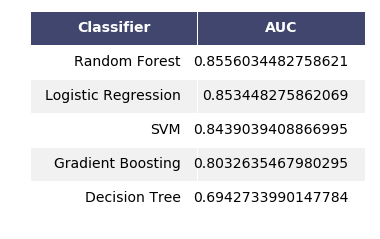

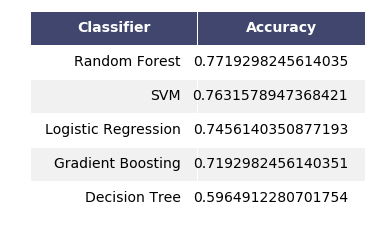

In [47]:

if_split = 0
if_PSV = 1
p241 = modules.build_patients(241,90, if_PSV = if_PSV)
pat_list = [p241]
label = '_P' + str(if_PSV)
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 0, if_split = if_split)


In [ ]:

if_split = 0

if_PSV = 1
if_remove_sleep = 0
p241 = modules.build_patients(241,90, if_PSV = if_PSV)
pat_list = [p241]
label = 'P' + str(if_PSV)  + '_sleep'
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_remove_sleep = if_remove_sleep)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   30.3s finished
 14%|█▍        | 1/7 [00:30<03:01, 30.31s/it]

Best score for validations set: 0.8446770620683663
Best parameters: {'C': 0.3415496396416171, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   25.9s finished
 29%|██▊       | 2/7 [00:56<02:20, 28.12s/it]

Best score for validations set: 0.8261390783129915
Best parameters: {'C': 2.5786599575714195, 'kernel': 'rbf', 'gamma': 0.01818181818181818}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.3s finished
 71%|███████▏  | 5/7 [01:00<00:24, 12.11s/it]

Best score for validations set: 0.6738348607913824
Best parameters: {'min_samples_split': 20, 'max_depth': 8, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.3min finished
 86%|████████▌ | 6/7 [05:19<00:53, 53.25s/it]

Best score for validations set: 0.8169395821569734
Best parameters: {'min_samples_split': 25, 'max_depth': 16, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


In [ ]:
if_split = 0
if_PSV = 1
if_remove_sleep = 1
sleep_class = 0
p241 = modules.build_patients(241,90, if_PSV = if_PSV)
pat_list = [p241]
label = 'P' + str(if_PSV) + label_w + '_sleep_awake'
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_remove_sleep = if_remove_sleep, sleep_class = sleep_class)


In [ ]:
if_split = 0
if_PSV = 1
if_remove_sleep = 1
sleep_class = 1
p241 = modules.build_patients(241,90, if_PSV = if_PSV)
pat_list = [p241]
label = 'P' + str(if_PSV) + label_w + '_sleep_sleep'
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_remove_sleep = if_remove_sleep, sleep_class = sleep_class)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   15.6s finished
 14%|█▍        | 1/7 [00:15<01:33, 15.58s/it]

Best score for validations set: 0.8139617515009211
Best parameters: {'C': 0.4267134413108296, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   30.0s finished
 29%|██▊       | 2/7 [00:45<01:54, 22.83s/it]

Best score for validations set: 0.8187197760686739
Best parameters: {'C': 1.9011553476557004, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished
 71%|███████▏  | 5/7 [00:49<00:19,  9.85s/it]

Best score for validations set: 0.7467855760320701
Best parameters: {'min_samples_split': 20, 'max_depth': 8, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.7min finished
 86%|████████▌ | 6/7 [05:30<00:55, 55.02s/it]

Best score for validations set: 0.8206179558163816
Best parameters: {'min_samples_split': 25, 'max_depth': 12, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 26.5min finished
100%|██████████| 7/7 [31:59<00:00, 274.22s/it]

Best score for validations set: 0.8393523006636495
Best parameters: {'min_samples_leaf': 20, 'learning_rate': 0.01, 'max_depth': 1, 'subsample': 0.3}


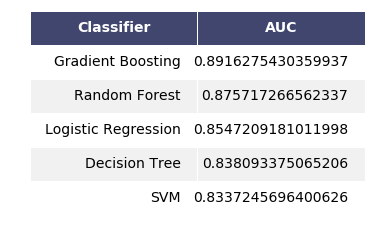

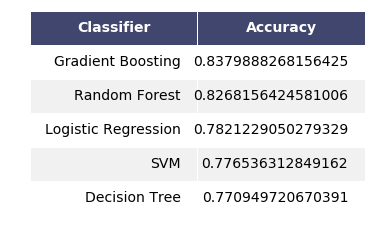

In [23]:
if_weekly = 0
if_2weekly = 0
if_split = 0
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''
if_PSV = 0
p231 = modules.build_patients(231,90, if_weekly = if_weekly, if_2weekly = if_2weekly, if_PSV = if_PSV)
pat_list = [p231]
label = '_P' + str(if_PSV) + label_w
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 0, if_split = if_split)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   28.8s finished
 14%|█▍        | 1/7 [00:28<02:52, 28.80s/it]

Best score for validations set: 0.830129142908987
Best parameters: {'C': 0.21587246227734905, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   57.2s finished
 29%|██▊       | 2/7 [01:26<03:35, 43.01s/it]

Best score for validations set: 0.8047939378290707
Best parameters: {'C': 3.0226200959539486, 'kernel': 'rbf', 'gamma': 0.018518518518518517}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.9s finished
 71%|███████▏  | 5/7 [01:33<00:37, 18.60s/it]

Best score for validations set: 0.7542542093008795
Best parameters: {'min_samples_split': 60, 'max_depth': 5, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.4min finished
 86%|████████▌ | 6/7 [08:00<01:20, 80.02s/it]

Best score for validations set: 0.8247631890838419
Best parameters: {'min_samples_split': 20, 'max_depth': 14, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 86.8min finished
100%|██████████| 7/7 [1:34:50<00:00, 813.00s/it]

Best score for validations set: 0.8317963914838209
Best parameters: {'min_samples_leaf': 30, 'learning_rate': 0.005, 'max_depth': 3, 'subsample': 0.4}


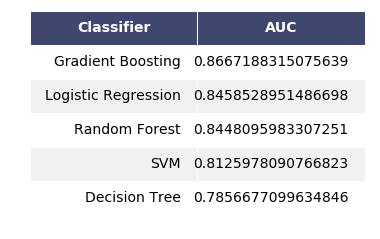

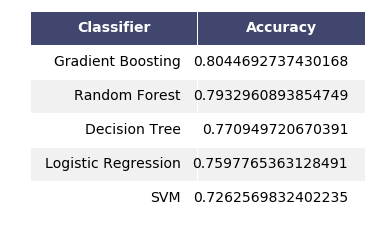

In [35]:
if_weekly = 0
if_2weekly = 0
if_split = 0
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''
if_PSV = 1
p231 = modules.build_patients(231,90, if_weekly = if_weekly, if_2weekly = if_2weekly, if_PSV = if_PSV)
pat_list = [p231]
label = 'P' + str(if_PSV) + label_w
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_split = if_split)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   27.5s finished
 14%|█▍        | 1/7 [00:27<02:44, 27.49s/it]

Best score for validations set: 0.8316186457194722
Best parameters: {'C': 0.1737070926637253, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   55.2s finished
 29%|██▊       | 2/7 [01:22<03:26, 41.35s/it]

Best score for validations set: 0.8115987419429285
Best parameters: {'C': 3.3063477982470046, 'kernel': 'rbf', 'gamma': 0.01818181818181818}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.5s finished
 71%|███████▏  | 5/7 [01:29<00:35, 17.85s/it]

Best score for validations set: 0.7529094069405122
Best parameters: {'min_samples_split': 60, 'max_depth': 5, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.9min finished
 86%|████████▌ | 6/7 [07:25<01:14, 74.24s/it]

Best score for validations set: 0.8255132561251258
Best parameters: {'min_samples_split': 25, 'max_depth': 13, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 39.0min finished
100%|██████████| 7/7 [46:25<00:00, 397.98s/it]

Best score for validations set: 0.8322566157709912
Best parameters: {'min_samples_leaf': 30, 'learning_rate': 0.01, 'max_depth': 1, 'subsample': 0.4}


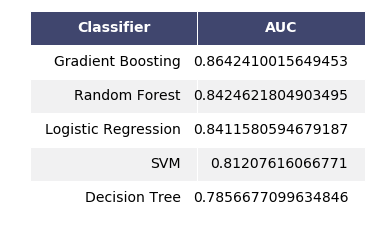

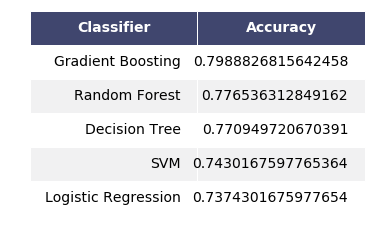

In [36]:
if_weekly = 0
if_2weekly = 0
if_split = 0
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''
if_PSV = 1
if_remove_sleep = 0
p231 = modules.build_patients(231,90, if_weekly = if_weekly, if_2weekly = if_2weekly, if_PSV = if_PSV)
pat_list = [p231]
label = 'P' + str(if_PSV) + label_w + '_sleep'
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_remove_sleep = if_remove_sleep)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   25.1s finished
 14%|█▍        | 1/7 [00:25<02:30, 25.09s/it]

Best score for validations set: 0.840178521509241
Best parameters: {'C': 0.15036072762121377, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   34.3s finished
 29%|██▊       | 2/7 [00:59<02:28, 29.69s/it]

Best score for validations set: 0.8099109339307679
Best parameters: {'C': 0.4744126998669043, 'kernel': 'rbf', 'gamma': 0.018518518518518517}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    5.0s finished
 71%|███████▏  | 5/7 [01:04<00:25, 12.89s/it]

Best score for validations set: 0.8042865229788662
Best parameters: {'min_samples_split': 20, 'max_depth': 3, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.0min finished
 86%|████████▌ | 6/7 [06:08<01:01, 61.38s/it]

Best score for validations set: 0.8379728358971902
Best parameters: {'min_samples_split': 40, 'max_depth': 15, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 30.7min finished
100%|██████████| 7/7 [36:54<00:00, 316.36s/it]

Best score for validations set: 0.8490032607306593
Best parameters: {'min_samples_leaf': 20, 'learning_rate': 0.005, 'max_depth': 3, 'subsample': 0.3}


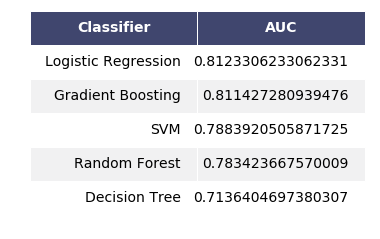

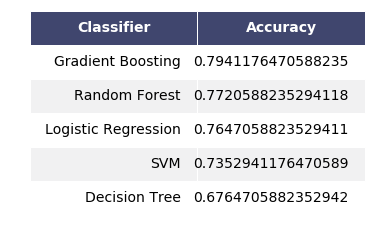

In [39]:
if_weekly = 0
if_2weekly = 0
if_split = 0
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''
if_PSV = 1
if_remove_sleep = 1
sleep_class = 0
p231 = modules.build_patients(231,90, if_weekly = if_weekly, if_2weekly = if_2weekly, if_PSV = if_PSV)
pat_list = [p231]
label = 'P' + str(if_PSV) + label_w + '_sleep_awake'
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_remove_sleep = if_remove_sleep, sleep_class = sleep_class)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.1s finished
 14%|█▍        | 1/7 [00:10<01:00, 10.08s/it]

Best score for validations set: 0.8252702463228779
Best parameters: {'C': 0.3721099134083043, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
 29%|██▊       | 2/7 [00:15<00:39,  7.98s/it]

Best score for validations set: 0.7984937090200247
Best parameters: {'C': 0.8575710245101202, 'kernel': 'rbf', 'gamma': 0.018518518518518517}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.8s finished
 71%|███████▏  | 5/7 [00:17<00:07,  3.54s/it]

Best score for validations set: 0.7032024505708716
Best parameters: {'min_samples_split': 60, 'max_depth': 8, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.8min finished
 86%|████████▌ | 6/7 [03:07<00:31, 31.22s/it]

Best score for validations set: 0.8030125819599504
Best parameters: {'min_samples_split': 20, 'max_depth': 12, 'max_features': 'auto', 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 14.5min finished
100%|██████████| 7/7 [17:40<00:00, 151.48s/it]

Best score for validations set: 0.8273410799726589
Best parameters: {'min_samples_leaf': 10, 'learning_rate': 0.02, 'max_depth': 3, 'subsample': 0.4}


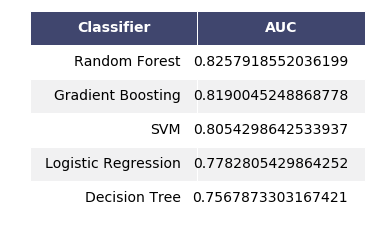

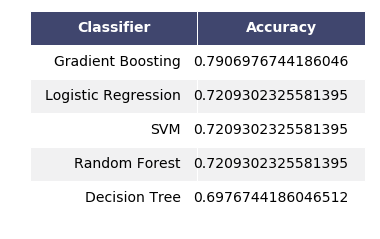

In [40]:
if_weekly = 0
if_2weekly = 0
if_split = 0
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''
if_PSV = 1
if_remove_sleep = 1
sleep_class = 1
p231 = modules.build_patients(231,90, if_weekly = if_weekly, if_2weekly = if_2weekly, if_PSV = if_PSV)
pat_list = [p231]
label = 'P' + str(if_PSV) + label_w + '_sleep_sleep'
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_remove_sleep = if_remove_sleep, sleep_class = sleep_class)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   18.1s finished
 14%|█▍        | 1/7 [00:18<01:48, 18.11s/it]

Best score for validations set: 0.8189189201475833
Best parameters: {'C': 0.22522747789389477, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   27.9s finished
 29%|██▊       | 2/7 [00:46<01:55, 23.01s/it]

Best score for validations set: 0.8178694894156541
Best parameters: {'C': 2.5475764809499513, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.2s finished
 71%|███████▏  | 5/7 [00:49<00:19,  9.86s/it]

Best score for validations set: 0.7788855451295728
Best parameters: {'max_depth': 4, 'criterion': 'entropy', 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.3min finished
 86%|████████▌ | 6/7 [05:07<00:51, 51.22s/it]

Best score for validations set: 0.8348853173988119
Best parameters: {'max_depth': 14, 'min_samples_split': 25, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 26.5min finished
100%|██████████| 7/7 [31:39<00:00, 271.33s/it]

Best score for validations set: 0.8430029590023659
Best parameters: {'max_depth': 1, 'learning_rate': 0.005, 'subsample': 0.3, 'min_samples_leaf': 10}


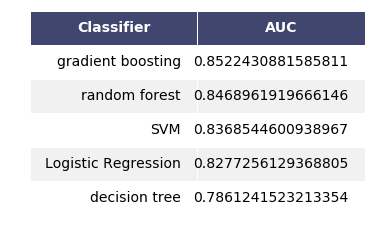

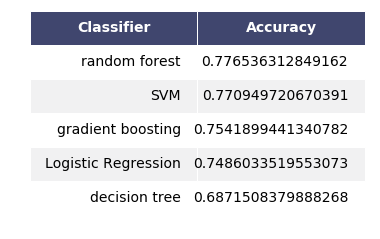

  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.1s finished
 14%|█▍        | 1/7 [00:14<01:24, 14.12s/it]

Best score for validations set: 0.6932602864519184
Best parameters: {'C': 0.5060717571980283, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   23.7s finished
 29%|██▊       | 2/7 [00:37<01:34, 18.92s/it]

Best score for validations set: 0.6907523301768388
Best parameters: {'C': 3.6956562457834665, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.1s finished
 71%|███████▏  | 5/7 [00:40<00:16,  8.18s/it]

Best score for validations set: 0.626294998298423
Best parameters: {'max_depth': 5, 'criterion': 'entropy', 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.4min finished
 86%|████████▌ | 6/7 [05:08<00:51, 51.35s/it]

Best score for validations set: 0.6859296844220907
Best parameters: {'max_depth': 12, 'min_samples_split': 25, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 24.7min finished
100%|██████████| 7/7 [29:49<00:00, 255.66s/it]

Best score for validations set: 0.6771221940035221
Best parameters: {'max_depth': 1, 'learning_rate': 0.005, 'subsample': 0.4, 'min_samples_leaf': 30}


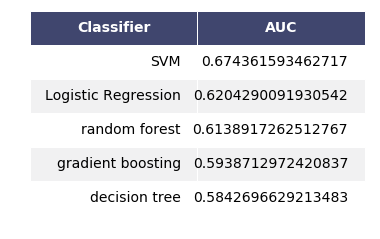

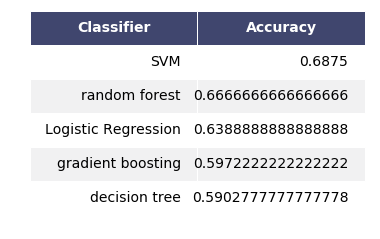

  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.9s finished
 14%|█▍        | 1/7 [00:11<01:11, 11.95s/it]

Best score for validations set: 0.6961172681233492
Best parameters: {'C': 0.1863317091319726, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.4s finished
 29%|██▊       | 2/7 [00:30<01:16, 15.20s/it]

Best score for validations set: 0.7004797772885674
Best parameters: {'C': 0.8526431358305405, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished
 71%|███████▏  | 5/7 [00:33<00:13,  6.63s/it]

Best score for validations set: 0.6191583794548344
Best parameters: {'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 5}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished
 86%|████████▌ | 6/7 [04:32<00:45, 45.45s/it]

Best score for validations set: 0.6886327513962093
Best parameters: {'max_depth': 12, 'min_samples_split': 40, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 22.2min finished
100%|██████████| 7/7 [26:48<00:00, 229.84s/it]

Best score for validations set: 0.7046137356067562
Best parameters: {'max_depth': 2, 'learning_rate': 0.005, 'subsample': 0.3, 'min_samples_leaf': 20}


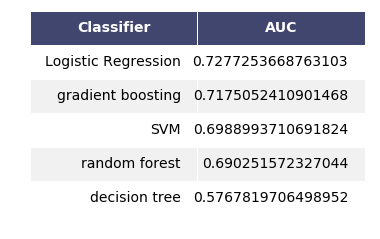

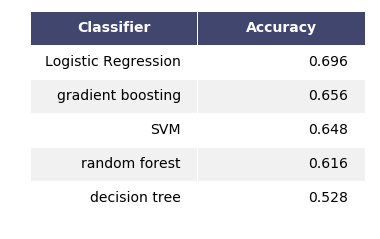

  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   25.1s finished
 14%|█▍        | 1/7 [00:25<02:33, 25.52s/it]

Best score for validations set: 0.8168410788598492
Best parameters: {'C': 9.798909764568092, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.3s finished
 29%|██▊       | 2/7 [00:40<01:42, 20.43s/it]

Best score for validations set: 0.8096585467778725
Best parameters: {'C': 2.2049629919256972, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.4s finished
 71%|███████▏  | 5/7 [00:43<00:17,  8.66s/it]

Best score for validations set: 0.7156022009019518
Best parameters: {'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.7min finished
 86%|████████▌ | 6/7 [04:27<00:44, 44.58s/it]

Best score for validations set: 0.7971478818059934
Best parameters: {'max_depth': 15, 'min_samples_split': 20, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 20.7min finished
100%|██████████| 7/7 [25:12<00:00, 216.07s/it]

Best score for validations set: 0.8166451916212498
Best parameters: {'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.3, 'min_samples_leaf': 20}


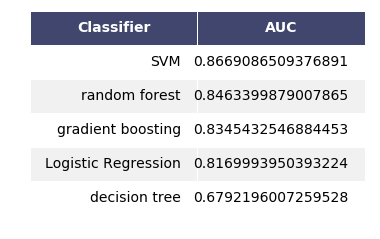

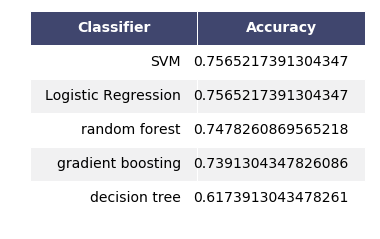

In [6]:
if_weekly = 0
if_2weekly = 0
if_split = 1
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''

rs = 77
label = '_ns_rs' + str(rs) + label_w
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, random_state = rs, if_split = if_split)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   16.9s finished
 14%|█▍        | 1/7 [00:16<01:41, 16.87s/it]

Best score for validations set: 0.8209337998765397
Best parameters: {'C': 0.30692597891615947, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   29.6s finished
 29%|██▊       | 2/7 [00:46<01:56, 23.24s/it]

Best score for validations set: 0.8182059779271239
Best parameters: {'C': 1.4191480919975707, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.3s finished
 71%|███████▏  | 5/7 [00:49<00:19,  9.96s/it]

Best score for validations set: 0.7783881729649892
Best parameters: {'max_depth': 4, 'criterion': 'entropy', 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished
 86%|████████▌ | 6/7 [05:02<00:50, 50.37s/it]

Best score for validations set: 0.8356125930725137
Best parameters: {'max_depth': 15, 'min_samples_split': 30, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 27.5min finished
100%|██████████| 7/7 [32:35<00:00, 279.30s/it]

Best score for validations set: 0.8472613183204317
Best parameters: {'max_depth': 3, 'learning_rate': 0.005, 'subsample': 0.4, 'min_samples_leaf': 30}


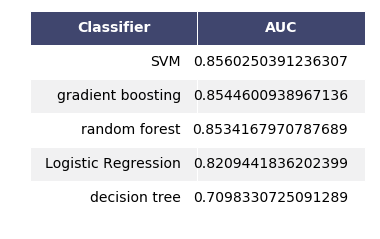

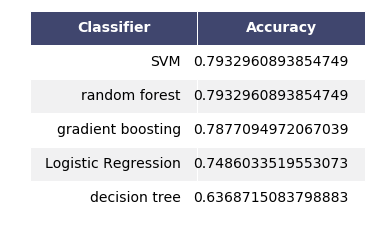

  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.4s finished
 14%|█▍        | 1/7 [00:10<01:02, 10.44s/it]

Best score for validations set: 0.6711516087260578
Best parameters: {'C': 0.6291268887565918, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   23.7s finished
 29%|██▊       | 2/7 [00:34<01:25, 17.09s/it]

Best score for validations set: 0.6688690778736937
Best parameters: {'C': 0.7152239262703883, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.2s finished
 71%|███████▏  | 5/7 [00:37<00:14,  7.47s/it]

Best score for validations set: 0.6088854129726673
Best parameters: {'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.5min finished
 86%|████████▌ | 6/7 [05:06<00:51, 51.06s/it]

Best score for validations set: 0.6609562923961375
Best parameters: {'max_depth': 15, 'min_samples_split': 20, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 24.9min finished
100%|██████████| 7/7 [29:59<00:00, 257.04s/it]

Best score for validations set: 0.6745556316915757
Best parameters: {'max_depth': 1, 'learning_rate': 0.005, 'subsample': 0.15, 'min_samples_leaf': 20}


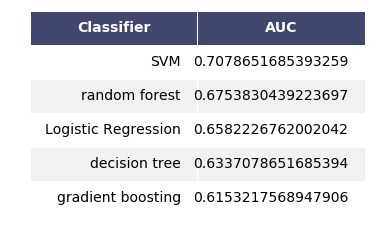

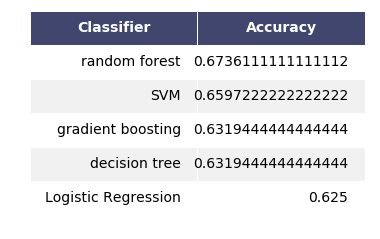

  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   13.3s finished
 14%|█▍        | 1/7 [00:13<01:20, 13.36s/it]

Best score for validations set: 0.7087417857060591
Best parameters: {'C': 1.0019910282812088, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.4s finished
 29%|██▊       | 2/7 [00:31<01:19, 15.87s/it]

Best score for validations set: 0.7047971147549614
Best parameters: {'C': 1.8836141832460205, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished
 71%|███████▏  | 5/7 [00:34<00:13,  6.89s/it]

Best score for validations set: 0.6121349281635371
Best parameters: {'max_depth': 5, 'criterion': 'entropy', 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.7min finished
 86%|████████▌ | 6/7 [04:17<00:42, 42.97s/it]

Best score for validations set: 0.6957338321964125
Best parameters: {'max_depth': 12, 'min_samples_split': 25, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 20.4min finished
100%|██████████| 7/7 [24:44<00:00, 212.08s/it]

Best score for validations set: 0.7153387982114401
Best parameters: {'max_depth': 2, 'learning_rate': 0.005, 'subsample': 0.2, 'min_samples_leaf': 10}


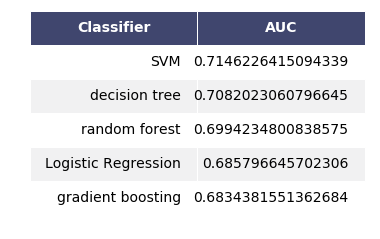

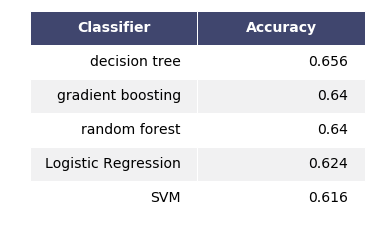

  0%|          | 0/7 [00:00<?, ?it/s]

epoch split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   25.1s finished
 14%|█▍        | 1/7 [00:25<02:31, 25.26s/it]

Best score for validations set: 0.8123052010238373
Best parameters: {'C': 8.787442694498653, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.3s finished
 29%|██▊       | 2/7 [00:38<01:36, 19.29s/it]

Best score for validations set: 0.8447180094374117
Best parameters: {'C': 4.24793347075216, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.1s finished
 71%|███████▏  | 5/7 [00:40<00:16,  8.15s/it]

Best score for validations set: 0.6949600390033257
Best parameters: {'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.3min finished
 86%|████████▌ | 6/7 [03:58<00:39, 39.72s/it]

Best score for validations set: 0.799054517595027
Best parameters: {'max_depth': 13, 'min_samples_split': 20, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 19.6min finished
100%|██████████| 7/7 [23:32<00:00, 201.80s/it]

Best score for validations set: 0.8222910971426581
Best parameters: {'max_depth': 3, 'learning_rate': 0.02, 'subsample': 0.3, 'min_samples_leaf': 20}


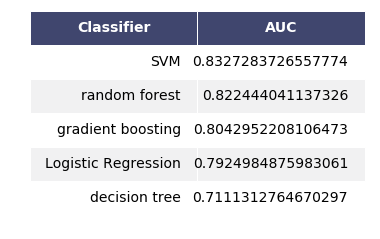

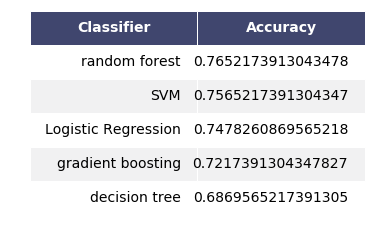

In [5]:
if_weekly = 0
if_2weekly = 0
if_split = 1
if if_weekly:
    label_w='_w'
elif if_2weekly:
    label_w = '_2w'
else:
    label_w = ''
p231, p222_1, p222_2, p241 = modules.build_patients(-3,90, if_weekly = if_weekly, if_2weekly = if_2weekly)
pat_list = [p231, p222_1, p222_2, p241]
rs = 11
label = '_ns_rs' + str(rs) + label_w
for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, random_state = rs, if_split = if_split)




  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.8s finished


 14%|█▍        | 1/7 [00:14<01:28, 14.79s/it]

Best score for validations set: 0.8189277849605494
Best parameters: {'C': 0.269229490551873, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   26.6s finished


 29%|██▊       | 2/7 [00:41<01:43, 20.71s/it]

Best score for validations set: 0.8236935378267854
Best parameters: {'C': 3.397454659163014, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.0s finished


 71%|███████▏  | 5/7 [00:44<00:17,  8.90s/it]

Best score for validations set: 0.7693113198233049
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished


 86%|████████▌ | 6/7 [04:55<00:49, 49.23s/it]

Best score for validations set: 0.8408488094516073
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 25.3min finished


100%|██████████| 7/7 [30:17<00:00, 259.64s/it]



Best score for validations set: 0.8508843259303186
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.3, 'min_samples_leaf': 20}


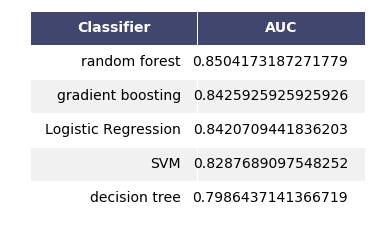

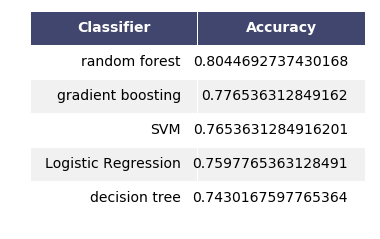



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.8s finished


 14%|█▍        | 1/7 [00:11<01:10, 11.79s/it]

Best score for validations set: 0.6659165472309
Best parameters: {'C': 0.7391251293369538, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.2s finished


 29%|██▊       | 2/7 [00:27<01:09, 13.99s/it]

Best score for validations set: 0.6824250082490703
Best parameters: {'C': 4.208720572557636, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.4s finished


 71%|███████▏  | 5/7 [00:30<00:12,  6.08s/it]

Best score for validations set: 0.6392978149162932
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.5min finished


 86%|████████▌ | 6/7 [04:01<00:40, 40.27s/it]

Best score for validations set: 0.6812717089650266
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 30}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 20.4min finished


100%|██████████| 7/7 [24:26<00:00, 209.44s/it]



Best score for validations set: 0.69559016525363
Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'subsample': 0.3, 'min_samples_leaf': 10}


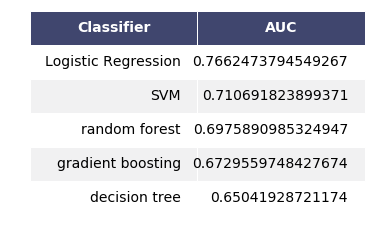

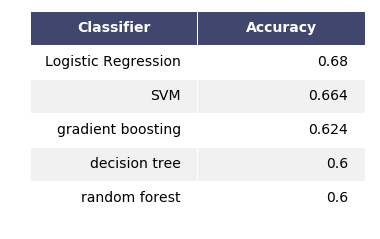



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.3s finished


 14%|█▍        | 1/7 [00:12<01:14, 12.34s/it]

Best score for validations set: 0.6837476815065341
Best parameters: {'C': 0.07380164596815834, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   20.9s finished


 29%|██▊       | 2/7 [00:33<01:23, 16.64s/it]

Best score for validations set: 0.6858567034497111
Best parameters: {'C': 1.7662958609039388, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished


 71%|███████▏  | 5/7 [00:36<00:14,  7.20s/it]

Best score for validations set: 0.6215689095843735
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished


 86%|████████▌ | 6/7 [04:35<00:45, 45.88s/it]

Best score for validations set: 0.6705330284442791
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 40}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 22.4min finished


100%|██████████| 7/7 [26:58<00:00, 231.25s/it]



Best score for validations set: 0.6668364556643355
Best parameters: {'learning_rate': 0.005, 'max_depth': 1, 'subsample': 0.4, 'min_samples_leaf': 10}


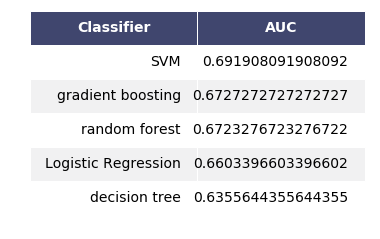

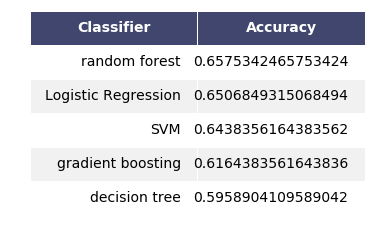



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   23.5s finished


 14%|█▍        | 1/7 [00:23<02:23, 23.88s/it]

Best score for validations set: 0.81166659427529
Best parameters: {'C': 8.235010633364325, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.1s finished


 29%|██▊       | 2/7 [00:36<01:32, 18.49s/it]

Best score for validations set: 0.8610867393476089
Best parameters: {'C': 6.2692632313541985, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.0s finished


 71%|███████▏  | 5/7 [00:39<00:15,  7.81s/it]

Best score for validations set: 0.7242865829822351
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.3min finished


 86%|████████▌ | 6/7 [03:55<00:39, 39.33s/it]

Best score for validations set: 0.8084915084915085
Best parameters: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 19.5min finished


100%|██████████| 7/7 [23:26<00:00, 200.96s/it]



Best score for validations set: 0.8312426703731052
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.3, 'min_samples_leaf': 20}


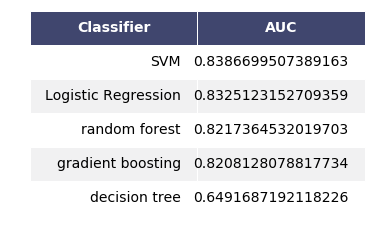

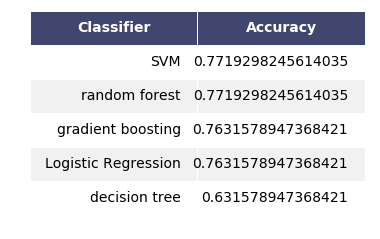

In [14]:
rs = 93
label = '_rs' + str(rs)
parameter_tuning_all(p231, label = label, C_range_num = 100, if_save = 1, random_state = rs)
parameter_tuning_all(p222_2, label = label, C_range_num = 100, if_save = 1, random_state = rs)
parameter_tuning_all(p222_1, label = label, C_range_num = 100, if_save = 1, random_state = rs)
parameter_tuning_all(p241, label = label, C_range_num = 100, if_save = 1, random_state = rs)



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   16.4s finished


 14%|█▍        | 1/7 [00:16<01:38, 16.45s/it]

Best score for validations set: 0.8299032925118724
Best parameters: {'C': 0.4656825023875783, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   28.7s finished


 29%|██▊       | 2/7 [00:45<01:52, 22.59s/it]

Best score for validations set: 0.82711539574397
Best parameters: {'C': 2.059416632587754, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.4s finished


 71%|███████▏  | 5/7 [00:48<00:19,  9.72s/it]

Best score for validations set: 0.7823035990659296
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.5min finished


 86%|████████▌ | 6/7 [05:19<00:53, 53.24s/it]

Best score for validations set: 0.8340824300851054
Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 27.7min finished


100%|██████████| 7/7 [33:04<00:00, 283.54s/it]



Best score for validations set: 0.8452948273669265
Best parameters: {'learning_rate': 0.01, 'max_depth': 1, 'subsample': 0.3, 'min_samples_leaf': 30}


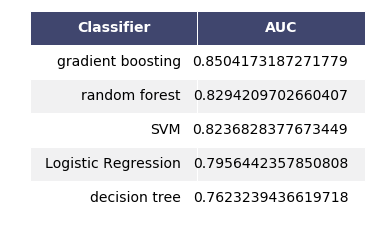

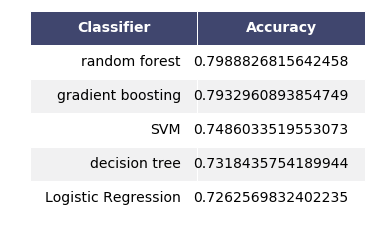



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.5s finished


 14%|█▍        | 1/7 [00:14<01:27, 14.53s/it]

Best score for validations set: 0.7130025837613426
Best parameters: {'C': 0.8643577126816886, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   19.1s finished


 29%|██▊       | 2/7 [00:33<01:24, 16.82s/it]

Best score for validations set: 0.7057954541715166
Best parameters: {'C': 1.7288394822207633, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.9s finished


 71%|███████▏  | 5/7 [00:36<00:14,  7.31s/it]

Best score for validations set: 0.6481797001975289
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished


 86%|████████▌ | 6/7 [04:37<00:46, 46.23s/it]

Best score for validations set: 0.7006864153744121
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 22.0min finished


100%|██████████| 7/7 [26:39<00:00, 228.44s/it]



Best score for validations set: 0.7120562965010482
Best parameters: {'learning_rate': 0.005, 'max_depth': 1, 'subsample': 0.2, 'min_samples_leaf': 10}


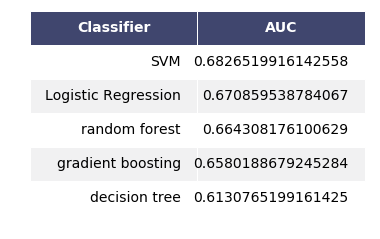

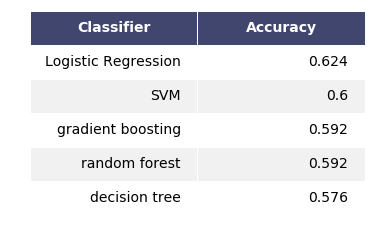



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.4s finished


 14%|█▍        | 1/7 [00:11<01:08, 11.43s/it]

Best score for validations set: 0.7039626674879924
Best parameters: {'C': 1.026958246142824, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   21.6s finished


 29%|██▊       | 2/7 [00:33<01:22, 16.51s/it]

Best score for validations set: 0.7317225950125995
Best parameters: {'C': 4.863340006567759, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.2s finished


 71%|███████▏  | 5/7 [00:36<00:14,  7.24s/it]

Best score for validations set: 0.6107276263876442
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.4min finished


 86%|████████▌ | 6/7 [04:59<00:49, 49.99s/it]

Best score for validations set: 0.6834713263444773
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 25}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 31.2min finished


100%|██████████| 7/7 [36:10<00:00, 310.07s/it]



Best score for validations set: 0.6766618346067024
Best parameters: {'learning_rate': 0.005, 'max_depth': 1, 'subsample': 0.15, 'min_samples_leaf': 10}


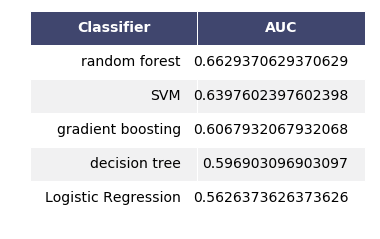

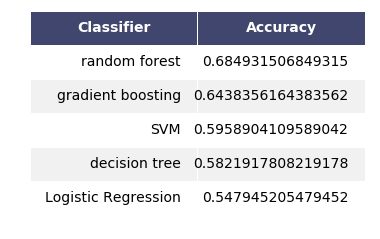



  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   15.4s finished


 14%|█▍        | 1/7 [00:15<01:32, 15.41s/it]

Best score for validations set: 0.7952221691352125
Best parameters: {'C': 2.116084546082586, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.3s finished


 29%|██▊       | 2/7 [00:28<01:11, 14.35s/it]

Best score for validations set: 0.7959040959040958
Best parameters: {'C': 1.380479263165598, 'gamma': 0.041666666666666664, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.1s finished


 71%|███████▏  | 5/7 [00:30<00:12,  6.16s/it]

Best score for validations set: 0.6820266689831906
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.2min finished


 86%|████████▌ | 6/7 [03:46<00:37, 37.79s/it]

Best score for validations set: 0.7873778395517526
Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 19.5min finished


100%|██████████| 7/7 [23:17<00:00, 199.58s/it]



Best score for validations set: 0.8007340485601355
Best parameters: {'learning_rate': 0.005, 'max_depth': 2, 'subsample': 0.2, 'min_samples_leaf': 20}


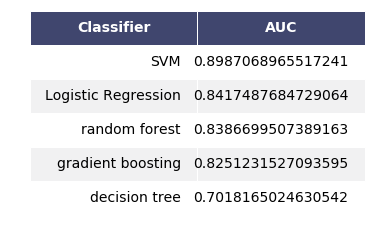

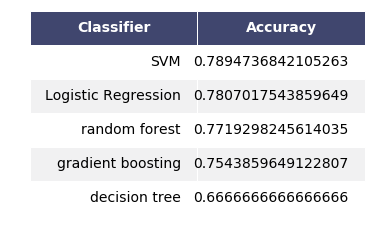

In [12]:
rs = 77
label = '_rs' + str(rs)
parameter_tuning_all(p231, label = label, C_range_num = 100, if_save = 1, random_state = rs)
parameter_tuning_all(p222_2, label = label, C_range_num = 100, if_save = 1, random_state = rs)
parameter_tuning_all(p222_1, label = label, C_range_num = 100, if_save = 1, random_state = rs)
parameter_tuning_all(p241, label = label, C_range_num = 100, if_save = 1, random_state = rs)

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.4s finished
 14%|█▍        | 1/7 [00:12<01:14, 12.40s/it]

Best score for validations set: 0.6383831041377123
Best parameters: {'C': 1.0932861727612417, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.2s finished
 29%|██▊       | 2/7 [00:30<01:16, 15.32s/it]

Best score for validations set: 0.6472336515251261
Best parameters: {'kernel': 'rbf', 'C': 9.252905788717376, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished
 71%|███████▏  | 5/7 [00:33<00:13,  6.68s/it]

Best score for validations set: 0.5678714675834492
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished
 86%|████████▌ | 6/7 [04:48<00:48, 48.01s/it]

Best score for validations set: 0.6214203423304806
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 30}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 22.7min finished
100%|██████████| 7/7 [27:29<00:00, 235.64s/it]

Best score for validations set: 0.6400187135786214
Best parameters: {'subsample': 0.2, 'max_depth': 2, 'min_samples_leaf': 20, 'learning_rate': 0.02}


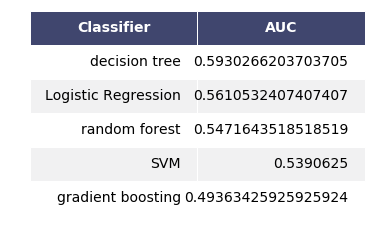

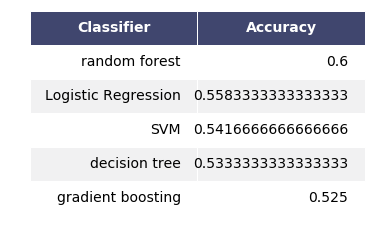

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.6s finished
 14%|█▍        | 1/7 [00:14<01:27, 14.58s/it]

Best score for validations set: 0.6615496839033879
Best parameters: {'C': 0.04696708986406989, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   24.4s finished
 29%|██▊       | 2/7 [00:39<01:37, 19.50s/it]

Best score for validations set: 0.7033948633291287
Best parameters: {'kernel': 'rbf', 'C': 2.0471667576316657, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.2s finished
 71%|███████▏  | 5/7 [00:42<00:16,  8.43s/it]

Best score for validations set: 0.580300992044638
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.8min finished
 86%|████████▌ | 6/7 [05:32<00:55, 55.34s/it]

Best score for validations set: 0.6797965230925359
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 25}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 24.9min finished
100%|██████████| 7/7 [30:26<00:00, 260.88s/it]

Best score for validations set: 0.6819445764230868
Best parameters: {'subsample': 0.4, 'max_depth': 2, 'min_samples_leaf': 10, 'learning_rate': 0.005}


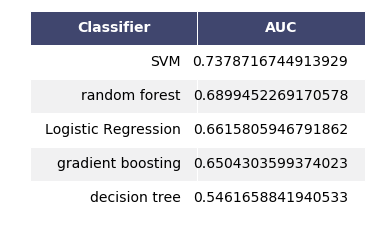

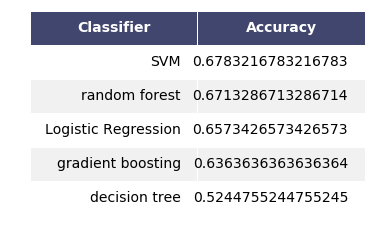

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   19.6s finished
 14%|█▍        | 1/7 [00:19<01:57, 19.66s/it]

Best score for validations set: 0.615317484084797
Best parameters: {'C': 0.039177681404430696, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   35.5s finished
 29%|██▊       | 2/7 [00:55<02:18, 27.61s/it]

Best score for validations set: 0.6143706528055559
Best parameters: {'kernel': 'rbf', 'C': 0.452270390378541, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.2s finished
 71%|███████▏  | 5/7 [00:59<00:23, 11.88s/it]

Best score for validations set: 0.5413763040840603
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.5min finished
 86%|████████▌ | 6/7 [06:31<01:05, 65.30s/it]

Best score for validations set: 0.6054520488038494
Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 25}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 27.9min finished
100%|██████████| 7/7 [34:23<00:00, 294.82s/it]

Best score for validations set: 0.6197979241608051
Best parameters: {'subsample': 0.15, 'max_depth': 1, 'min_samples_leaf': 20, 'learning_rate': 0.02}


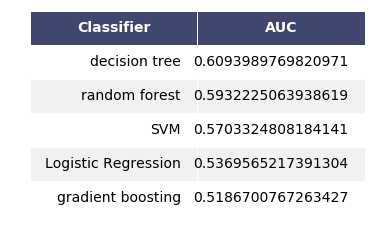

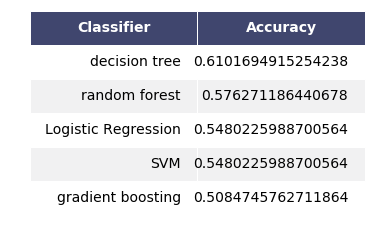

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   19.3s finished
 14%|█▍        | 1/7 [00:19<01:55, 19.30s/it]

Best score for validations set: 0.7093128022439856
Best parameters: {'C': 0.23388782788456985, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.6s finished
 29%|██▊       | 2/7 [00:32<01:22, 16.44s/it]

Best score for validations set: 0.7479498618283531
Best parameters: {'kernel': 'rbf', 'C': 8.269062534987489, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.2s finished
 71%|███████▏  | 5/7 [00:35<00:14,  7.02s/it]

Best score for validations set: 0.6971727683648212
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.6min finished
 86%|████████▌ | 6/7 [04:11<00:41, 41.99s/it]

Best score for validations set: 0.7594024133399313
Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 25}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 21.3min finished
100%|██████████| 7/7 [25:31<00:00, 218.80s/it]

Best score for validations set: 0.7638813581082514
Best parameters: {'subsample': 0.3, 'max_depth': 2, 'min_samples_leaf': 30, 'learning_rate': 0.005}


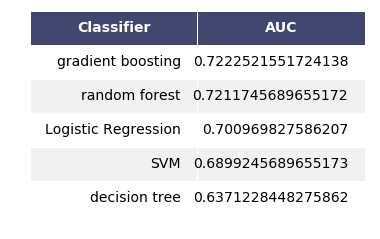

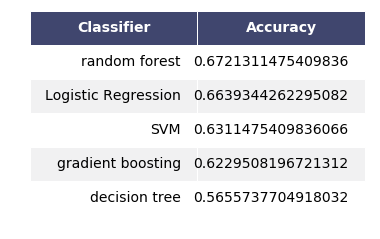

In [7]:
#label = '_split'
label = '_w'
if_split = 1
parameter_tuning_all(p222_2, label = label, if_split = if_split, C_range_num = 100, if_save = 1)
parameter_tuning_all(p222_1, label = label, if_split = if_split, C_range_num = 100, if_save = 1)
parameter_tuning_all(p231, label = label, if_split = if_split, C_range_num = 100, if_save = 1)
parameter_tuning_all(p241, label = label, if_split = if_split, C_range_num = 100, if_save = 1)

  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.6s finished
 14%|█▍        | 1/7 [00:14<01:27, 14.59s/it]

Best score for validations set: 0.8139609759969212
Best parameters: {'C': 0.42852808455445107, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   31.1s finished
 29%|██▊       | 2/7 [00:45<01:54, 22.88s/it]

Best score for validations set: 0.8185563185445256
Best parameters: {'C': 1.9860788488838332, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.8s finished
 71%|███████▏  | 5/7 [00:49<00:19,  9.93s/it]

Best score for validations set: 0.7412009243686781
Best parameters: {'max_depth': 4, 'criterion': 'entropy', 'min_samples_split': 5}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.8min finished
 86%|████████▌ | 6/7 [05:41<00:56, 56.94s/it]

Best score for validations set: 0.8215070577816799
Best parameters: {'max_depth': 14, 'min_samples_split': 20, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 27.5min finished
100%|██████████| 7/7 [33:15<00:00, 285.06s/it]

Best score for validations set: 0.8394606572915185
Best parameters: {'max_depth': 2, 'learning_rate': 0.005, 'subsample': 0.4, 'min_samples_leaf': 30}


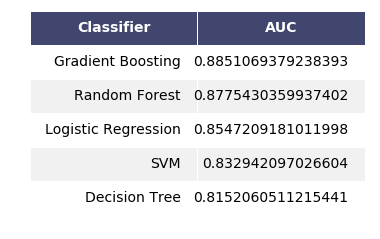

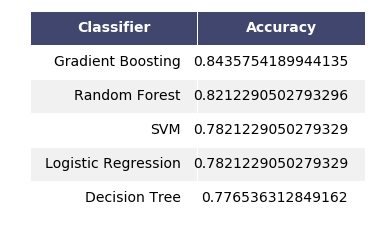

  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   16.6s finished
 14%|█▍        | 1/7 [00:16<01:39, 16.58s/it]

Best score for validations set: 0.817338336029413
Best parameters: {'C': 0.4303852485619112, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   27.8s finished
 29%|██▊       | 2/7 [00:44<01:51, 22.21s/it]

Best score for validations set: 0.8194414627652717
Best parameters: {'C': 2.4081275902910084, 'kernel': 'rbf', 'gamma': 0.04}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.3s finished
 71%|███████▏  | 5/7 [00:47<00:19,  9.54s/it]

Best score for validations set: 0.7404891119773223
Best parameters: {'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.9min finished
 86%|████████▌ | 6/7 [05:40<00:56, 56.77s/it]

Best score for validations set: 0.82151015979768
Best parameters: {'max_depth': 14, 'min_samples_split': 20, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 27.5min finished
100%|██████████| 7/7 [33:09<00:00, 284.25s/it]

Best score for validations set: 0.8380919863267414
Best parameters: {'max_depth': 1, 'learning_rate': 0.01, 'subsample': 0.4, 'min_samples_leaf': 30}


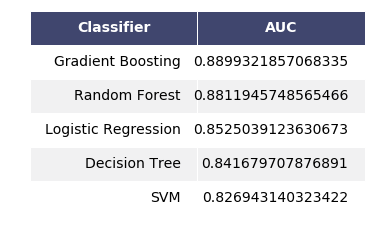

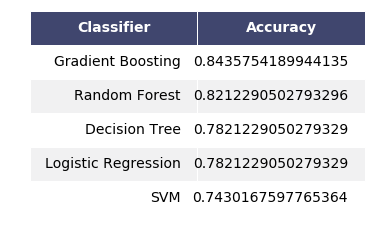

  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    6.2s finished
 14%|█▍        | 1/7 [00:06<00:37,  6.25s/it]

Best score for validations set: 0.8820510873142452
Best parameters: {'C': 0.30009153040341796, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.1s finished
 29%|██▊       | 2/7 [00:10<00:25,  5.17s/it]

Best score for validations set: 0.8637958532695376
Best parameters: {'C': 7.756731690830758, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
 71%|███████▏  | 5/7 [00:11<00:04,  2.30s/it]

Best score for validations set: 0.7570871623503204
Best parameters: {'max_depth': 4, 'criterion': 'entropy', 'min_samples_split': 10}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.5min finished
 86%|████████▌ | 6/7 [02:39<00:26, 26.56s/it]

Best score for validations set: 0.8117794486215539
Best parameters: {'max_depth': 15, 'min_samples_split': 25, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 13.1min finished
100%|██████████| 7/7 [15:44<00:00, 134.89s/it]

Best score for validations set: 0.8321662742715376
Best parameters: {'max_depth': 1, 'learning_rate': 0.005, 'subsample': 0.4, 'min_samples_leaf': 10}


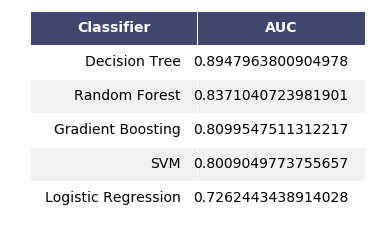

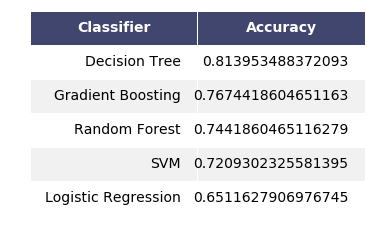

  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   17.1s finished
 14%|█▍        | 1/7 [00:17<01:42, 17.08s/it]

Best score for validations set: 0.8398990895537857
Best parameters: {'C': 0.5495421245336349, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.2s finished
 29%|██▊       | 2/7 [00:35<01:28, 17.67s/it]

Best score for validations set: 0.8421450595138441
Best parameters: {'C': 2.2030332995781676, 'kernel': 'rbf', 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.5s finished
 71%|███████▏  | 5/7 [00:37<00:15,  7.57s/it]

Best score for validations set: 0.7647984880374383
Best parameters: {'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.9min finished
 86%|████████▌ | 6/7 [04:33<00:45, 45.65s/it]

Best score for validations set: 0.8387859454848405
Best parameters: {'max_depth': 14, 'min_samples_split': 25, 'criterion': 'entropy', 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 21.7min finished
100%|██████████| 7/7 [26:17<00:00, 225.41s/it]

Best score for validations set: 0.8595898806534166
Best parameters: {'max_depth': 2, 'learning_rate': 0.005, 'subsample': 0.15, 'min_samples_leaf': 20}


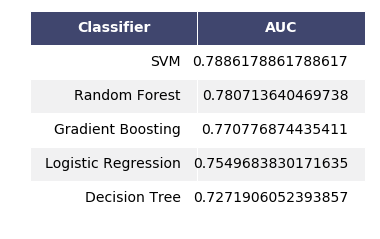

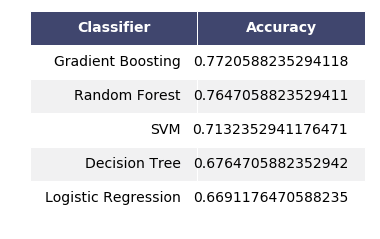

In [9]:
parameter_tuning_all(p231, label = '', C_range_num = 100, if_save = 1)
parameter_tuning_all(p231, label = '_sleep', if_remove_sleep=0, C_range_num = 100, if_save = 1)
parameter_tuning_all(p231, label = '_sleep_sleep', sleep_class = 1, C_range_num = 100, if_save = 1)
parameter_tuning_all(p231, label = '_sleep_awake', sleep_class = 0, C_range_num = 100, if_save = 1)


  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   13.2s finished

 14%|█▍        | 1/7 [00:13<01:19, 13.22s/it]

Best score for validations set: 0.7187260025349999
Best parameters: {'C': 0.17982549990359464, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.9s finished

 29%|██▊       | 2/7 [00:30<01:15, 15.07s/it]

Best score for validations set: 0.7147401984144435
Best parameters: {'kernel': 'rbf', 'C': 5.638797936635185, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.5s finished

 71%|███████▏  | 5/7 [00:32<00:13,  6.53s/it]

Best score for validations set: 0.6415319817123424
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished

 86%|████████▌ | 6/7 [04:32<00:45, 45.42s/it]

Best score for validations set: 0.7074368919956646
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 21.8min finished

100%|██████████| 7/7 [26:22<00:00, 226.11s/it]


Best score for validations set: 0.732607699351532
Best parameters: {'subsample': 0.2, 'max_depth': 1, 'min_samples_leaf': 10, 'learning_rate': 0.01}


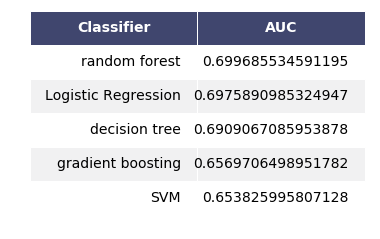

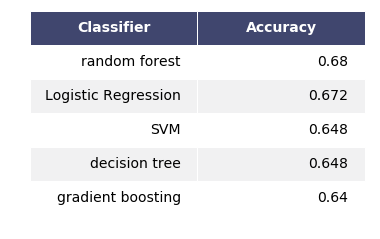


  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.0s finished

 14%|█▍        | 1/7 [00:13<01:23, 13.98s/it]

Best score for validations set: 0.6594353052779768
Best parameters: {'C': 0.05810287567039303, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   23.3s finished

 29%|██▊       | 2/7 [00:37<01:33, 18.65s/it]

Best score for validations set: 0.6675104059684965
Best parameters: {'kernel': 'rbf', 'C': 5.405465164536915, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.0s finished

 71%|███████▏  | 5/7 [00:40<00:16,  8.07s/it]

Best score for validations set: 0.6498224391825915
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.4min finished

 86%|████████▌ | 6/7 [05:05<00:50, 50.99s/it]

Best score for validations set: 0.6547374714676374
Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 24.6min finished

100%|██████████| 7/7 [29:41<00:00, 254.53s/it]


Best score for validations set: 0.6411385969319632
Best parameters: {'subsample': 0.4, 'max_depth': 1, 'min_samples_leaf': 30, 'learning_rate': 0.005}


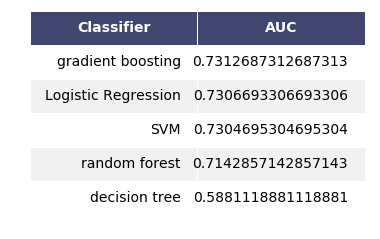

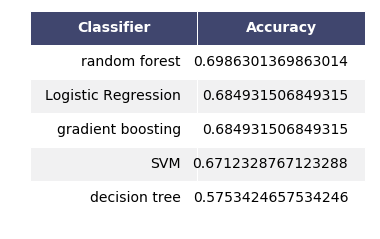


  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   17.1s finished

 14%|█▍        | 1/7 [00:17<01:42, 17.10s/it]

Best score for validations set: 0.8140418423450643
Best parameters: {'C': 0.4281949000787743, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   33.9s finished

 29%|██▊       | 2/7 [00:51<02:07, 25.52s/it]

Best score for validations set: 0.8188014179208172
Best parameters: {'kernel': 'rbf', 'C': 1.910173570972288, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.9s finished

 71%|███████▏  | 5/7 [00:55<00:22, 11.19s/it]

Best score for validations set: 0.7432516043038441
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.5min finished

 86%|████████▌ | 6/7 [06:26<01:04, 64.41s/it]

Best score for validations set: 0.8239245979065242
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 27.7min finished

100%|██████████| 7/7 [34:08<00:00, 292.67s/it]


Best score for validations set: 0.8387322584740926
Best parameters: {'subsample': 0.3, 'max_depth': 2, 'min_samples_leaf': 20, 'learning_rate': 0.005}


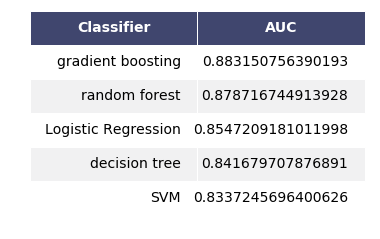

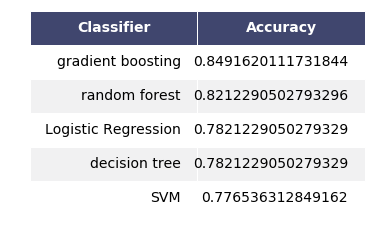


  0%|          | 0/7 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   15.6s finished

 14%|█▍        | 1/7 [00:15<01:33, 15.60s/it]

Best score for validations set: 0.8034226642922294
Best parameters: {'C': 0.4374978727825228, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.5s finished

 29%|██▊       | 2/7 [00:31<01:17, 15.54s/it]

Best score for validations set: 0.8251270468661773
Best parameters: {'kernel': 'rbf', 'C': 5.515544352175713, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished

 71%|███████▏  | 5/7 [00:33<00:13,  6.74s/it]

Best score for validations set: 0.7255092733353602
Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 60}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.8min finished

 86%|████████▌ | 6/7 [04:24<00:44, 44.07s/it]

Best score for validations set: 0.7969508752117448
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 21.8min finished

100%|██████████| 7/7 [26:15<00:00, 225.01s/it]


Best score for validations set: 0.8121574078095819
Best parameters: {'subsample': 0.4, 'max_depth': 3, 'min_samples_leaf': 30, 'learning_rate': 0.005}


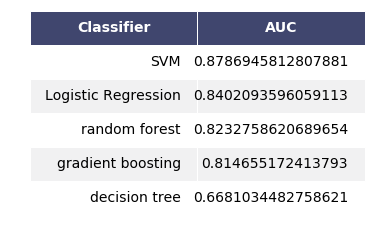

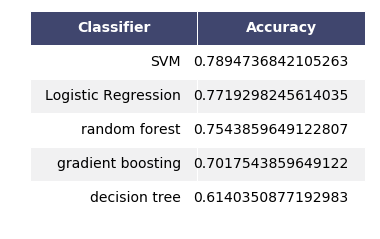

In [13]:
label = '_90_nd'
parameter_tuning_all(p222_2, label = label, C_range_num = 100, if_save = 1)
parameter_tuning_all(p222_1, label = label, C_range_num = 100, if_save = 1)
parameter_tuning_all(p231, label = label, C_range_num = 100, if_save = 1)
parameter_tuning_all(p241, label = label, C_range_num = 100, if_save = 1)


  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.3s finished

 14%|█▍        | 1/7 [00:14<01:26, 14.40s/it]

Best score for validations set: 0.6183984346426742
Best parameters: {'C': 6.535343388104662, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   17.0s finished

 29%|██▊       | 2/7 [00:31<01:18, 15.73s/it]

Best score for validations set: 0.6339910516177797
Best parameters: {'kernel': 'rbf', 'C': 1.6876283895658653, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished

 71%|███████▏  | 5/7 [00:34<00:13,  6.84s/it]

Best score for validations set: 0.563887898349304
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.9min finished

 86%|████████▌ | 6/7 [04:32<00:45, 45.40s/it]

Best score for validations set: 0.6497322495306367
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 30}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 20.9min finished

100%|██████████| 7/7 [25:28<00:00, 218.36s/it]


Best score for validations set: 0.6586417721210348
Best parameters: {'subsample': 0.15, 'max_depth': 3, 'min_samples_leaf': 10, 'learning_rate': 0.005}


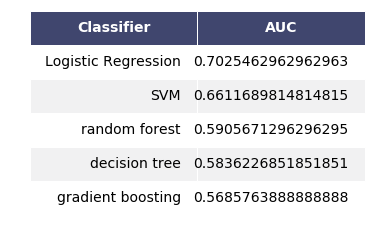

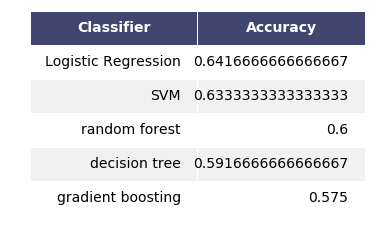


  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.5s finished

 14%|█▍        | 1/7 [00:14<01:27, 14.54s/it]

Best score for validations set: 0.5595798793746262
Best parameters: {'C': 0.1349085872966712, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   23.3s finished

 29%|██▊       | 2/7 [00:37<01:34, 18.93s/it]

Best score for validations set: 0.592905138720422
Best parameters: {'kernel': 'rbf', 'C': 6.117367402205602, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.4s finished

 71%|███████▏  | 5/7 [00:41<00:16,  8.25s/it]

Best score for validations set: 0.5355145831741825
Best parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 5}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.4min finished

 86%|████████▌ | 6/7 [05:09<00:51, 51.58s/it]

Best score for validations set: 0.5592863588738403
Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 25}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 22.6min finished

100%|██████████| 7/7 [27:49<00:00, 238.48s/it]


Best score for validations set: 0.5517781094323428
Best parameters: {'subsample': 0.4, 'max_depth': 1, 'min_samples_leaf': 10, 'learning_rate': 0.005}


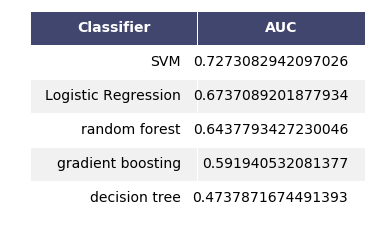

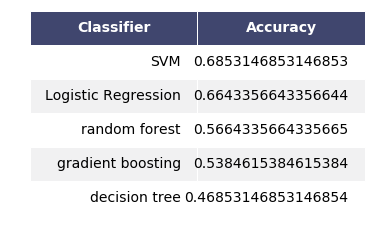


  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   17.8s finished

 14%|█▍        | 1/7 [00:17<01:46, 17.80s/it]

Best score for validations set: 0.5806663707220036
Best parameters: {'C': 0.02602499877996305, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   32.0s finished

 29%|██▊       | 2/7 [00:49<02:04, 24.90s/it]

Best score for validations set: 0.5678598427555313
Best parameters: {'kernel': 'rbf', 'C': 1.1318739019648285, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.8s finished

 71%|███████▏  | 5/7 [00:53<00:21, 10.72s/it]

Best score for validations set: 0.5644849697700879
Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 20}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.9min finished

 86%|████████▌ | 6/7 [05:51<00:58, 58.51s/it]

Best score for validations set: 0.6028356689691877
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 25.6min finished

100%|██████████| 7/7 [31:28<00:00, 269.86s/it]


Best score for validations set: 0.6101251261195629
Best parameters: {'subsample': 0.3, 'max_depth': 2, 'min_samples_leaf': 30, 'learning_rate': 0.005}


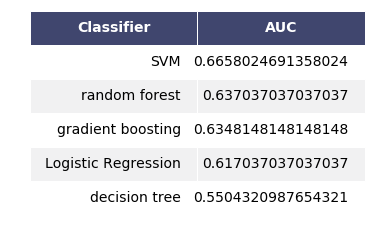

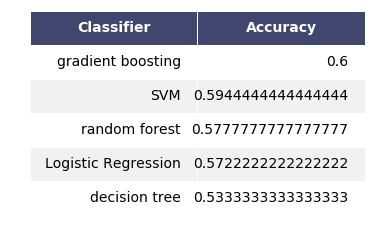


  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   15.3s finished

 14%|█▍        | 1/7 [00:15<01:31, 15.28s/it]

Best score for validations set: 0.7856653225806451
Best parameters: {'C': 0.39312755141357825, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.0s finished

 29%|██▊       | 2/7 [00:28<01:10, 14.13s/it]

Best score for validations set: 0.8113049322113137
Best parameters: {'kernel': 'rbf', 'C': 2.023234330602982, 'gamma': 0.041666666666666664}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.0s finished

 71%|███████▏  | 5/7 [00:30<00:12,  6.06s/it]

Best score for validations set: 0.7692264200561011
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 40}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.2min finished

 86%|████████▌ | 6/7 [03:43<00:37, 37.28s/it]

Best score for validations set: 0.8309914095371668
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 20}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 19.4min finished

100%|██████████| 7/7 [23:09<00:00, 198.49s/it]


Best score for validations set: 0.8496160589060309
Best parameters: {'subsample': 0.3, 'max_depth': 3, 'min_samples_leaf': 10, 'learning_rate': 0.005}


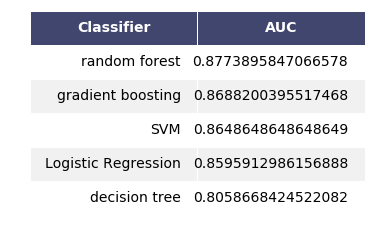

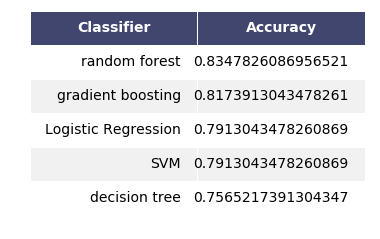

In [16]:
label = '_2w'
if_split = 1
parameter_tuning_all(p222_2, label = label, if_split = if_split, C_range_num = 100, if_save = 1)
parameter_tuning_all(p222_1, label = label, if_split = if_split, C_range_num = 100, if_save = 1)
parameter_tuning_all(p231, label = label, if_split = if_split, C_range_num = 100, if_save = 1)
parameter_tuning_all(p241, label = label, if_split = if_split, C_range_num = 100, if_save = 1)

In [12]:
parameter_tuning_all(p222_2, C_range_num = 100, if_scaler = 1, 
                     if_remove_icd =1, if_remove_sleep = 0, \
                     le_class = None, if_remove_le = 1, if_save = 1, if_remove_delta = 0)

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   17.9s finished
 14%|█▍        | 1/7 [00:17<01:47, 17.90s/it]

Best score for validations set: 0.7245304162587004
Best parameters: {'C': 0.0414036743253537, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   19.8s finished
 29%|██▊       | 2/7 [00:37<01:34, 18.89s/it]

Best score for validations set: 0.7209469693230317
Best parameters: {'kernel': 'rbf', 'gamma': 0.034482758620689655, 'C': 2.445387187569815}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.9s finished
 71%|███████▏  | 5/7 [00:40<00:16,  8.13s/it]

Best score for validations set: 0.6403124954192607
Best parameters: {'criterion': 'entropy', 'min_samples_split': 20, 'max_depth': 8}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.3min finished
 86%|████████▌ | 6/7 [04:57<00:49, 49.51s/it]

Best score for validations set: 0.7101887010324576
Best parameters: {'criterion': 'entropy', 'min_samples_split': 25, 'max_depth': 13, 'max_features': 'auto'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 21.8min finished
100%|██████████| 7/7 [26:43<00:00, 229.13s/it]

Best score for validations set: 0.7299002393501737
Best parameters: {'min_samples_leaf': 10, 'max_depth': 2, 'subsample': 0.2, 'learning_rate': 0.005}


In [36]:
parameter_tuning_all(p231, C_range_num = 100, if_scaler = 1, 
                     if_remove_icd =1, if_remove_sleep = 0, \
                     le_class = None, if_remove_le = 1, if_save = 1, if_remove_delta = 0)


  0%|          | 0/7 [00:00<?, ?it/s]

Total outliers removed: 21
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   19.9s finished

 14%|█▍        | 1/7 [00:19<01:59, 19.93s/it]

Best score for validations set: 0.8284493782971579
Best parameters: {'penalty': 'l1', 'C': 0.9087943416819215}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   32.6s finished

 29%|██▊       | 2/7 [00:52<02:11, 26.27s/it]

Best score for validations set: 0.8415822340569515
Best parameters: {'C': 3.5588807813816326, 'gamma': 0.034482758620689655, 'kernel': 'rbf'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.9s finished

 71%|███████▏  | 5/7 [00:56<00:22, 11.28s/it]

Best score for validations set: 0.8027130542877472
Best parameters: {'min_samples_split': 40, 'max_depth': 4, 'criterion': 'entropy'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.1min finished

 86%|████████▌ | 6/7 [06:01<01:00, 60.23s/it]

Best score for validations set: 0.8439371452196451
Best parameters: {'max_features': 'auto', 'min_samples_split': 20, 'max_depth': 13, 'criterion': 'entropy'}
Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed: 29.1min finished

100%|██████████| 7/7 [35:08<00:00, 301.21s/it]


Best score for validations set: 0.8597971080824425
Best parameters: {'learning_rate': 0.01, 'subsample': 0.3, 'min_samples_leaf': 30, 'max_depth': 1}
